<a href="https://colab.research.google.com/github/el-grudge/mleng-zoomcamp/blob/main/capstone_01/capstone_where_am_i.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# setup

https://colab.research.google.com/drive/1wr06qo70j1OINqWFuGHuqbAk5eGfajRz#scrollTo=WeFbSiyXQcmT

In [ ]:
!pip install opendatasets

In [ ]:
import opendatasets as od

In [ ]:
od.download("https://www.kaggle.com/datasets/ahmedhaytham/where-am-i")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: minasonbol
Your Kaggle Key: ··········


100%|██████████| 4.06G/4.06G [00:41<00:00, 105MB/s]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
from tensorflow.keras.preprocessing.image import load_img

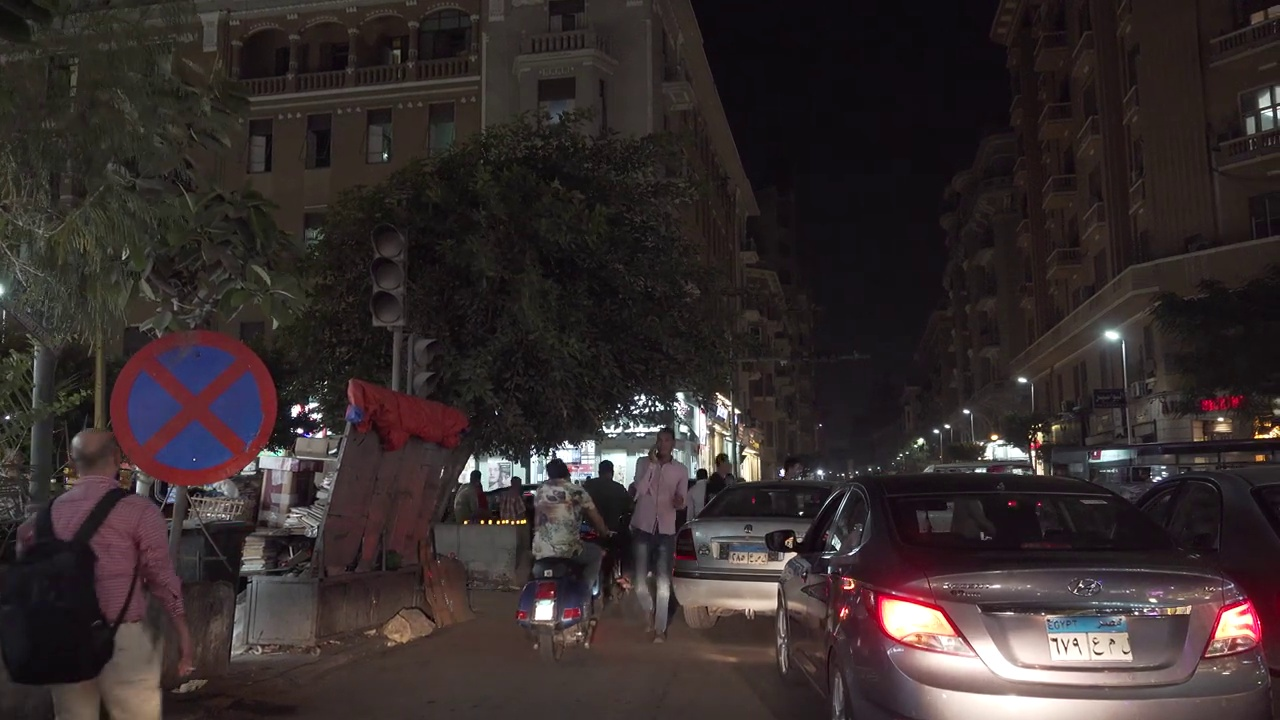

In [ ]:
path = './where-am-i/Data/train/cairo/'
name = 'cairo_frame0.jpg'
fullname = f'{path}/{name}'
load_img(fullname)

# Xception model

## create dataset

In [ ]:
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_generator = ImageDataGenerator(preprocessing_function=preprocess_input)

train_dataset = train_generator.flow_from_directory(
    './where-am-i/Data/train',
    target_size=(150,150),
    batch_size=32
)

Found 1800 images belonging to 3 classes.


In [ ]:
# train_dataset.class_indices

In [ ]:
val_generator = ImageDataGenerator(preprocessing_function=preprocess_input)

val_dataset = val_generator.flow_from_directory(
    './where-am-i/Data/Val',
    target_size=(150,150),
    batch_size=32,
    shuffle=False
)

Found 300 images belonging to 3 classes.


## xception vanilla

In [ ]:
base_model = Xception(
    weights='imagenet',
    include_top=False,
    input_shape=(150,150,3)
)

base_model.trainable = False

inputs = keras.Input(shape=(150,150,3))

base = base_model(inputs, training=False)

vectors = keras.layers.GlobalAveragePooling2D()(base)

outputs = keras.layers.Dense(3)(vectors)

model = keras.Model(inputs, outputs)

83683744/83683744 [==============================] - 1s 0us/step


In [ ]:
learning_rate = 0.01
optimizer = keras.optimizers.Adam(learning_rate=learning_rate)

loss = keras.losses.CategoricalCrossentropy(from_logits=True)

model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

In [ ]:
history = model.fit(train_dataset, epochs=10, validation_data=val_dataset)

Epoch 1/10
57/57 [==============================] - 33s 352ms/step - loss: 0.4149 - accuracy: 0.8828 - val_loss: 1.1721 - val_accuracy: 0.6067
Epoch 2/10
57/57 [==============================] - 16s 273ms/step - loss: 0.0306 - accuracy: 0.9906 - val_loss: 0.8189 - val_accuracy: 0.6967
Epoch 3/10
57/57 [==============================] - 15s 267ms/step - loss: 0.0159 - accuracy: 0.9978 - val_loss: 0.8072 - val_accuracy: 0.6967
Epoch 4/10
57/57 [==============================] - 16s 274ms/step - loss: 0.0092 - accuracy: 0.9994 - val_loss: 0.7893 - val_accuracy: 0.7167
Epoch 5/10
57/57 [==============================] - 18s 312ms/step - loss: 0.0072 - accuracy: 0.9994 - val_loss: 1.1058 - val_accuracy: 0.6533
Epoch 6/10
57/57 [==============================] - 16s 285ms/step - loss: 0.0058 - accuracy: 0.9994 - val_loss: 0.9813 - val_accuracy: 0.6800
Epoch 7/10
57/57 [==============================] - 15s 264ms/step - loss: 0.0036 - accuracy: 1.0000 - val_loss: 0.9727 - val_accuracy: 0.6767

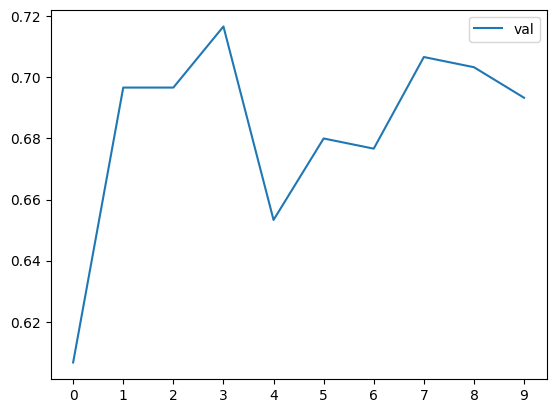

In [ ]:
plt.plot(history.history['val_accuracy'], label='val')
plt.xticks(np.arange(10))
plt.legend()

## hyperparameter tuning

### learning rate

In [ ]:
scores = {}

for lr in [0.0001, 0.001, 0.01, 0.1]:
  optimizer = keras.optimizers.Adam(learning_rate=lr)
  model.compile(optimizer, loss, metrics=['accuracy'])
  history = model.fit(train_dataset, epochs=10, validation_data=val_dataset)
  scores[lr] = history.history

  print()
  print()

Epoch 1/10
57/57 [==============================] - 19s 286ms/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 0.9092 - val_accuracy: 0.6933
Epoch 2/10
57/57 [==============================] - 15s 266ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.9093 - val_accuracy: 0.6900
Epoch 3/10
57/57 [==============================] - 15s 262ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.8870 - val_accuracy: 0.6933
Epoch 4/10
57/57 [==============================] - 15s 260ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.8737 - val_accuracy: 0.7000
Epoch 5/10
57/57 [==============================] - 16s 275ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.9068 - val_accuracy: 0.6933
Epoch 6/10
57/57 [==============================] - 18s 309ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.9404 - val_accuracy: 0.6900
Epoch 7/10
57/57 [==============================] - 15s 268ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.9096 - val_accuracy: 0.7067

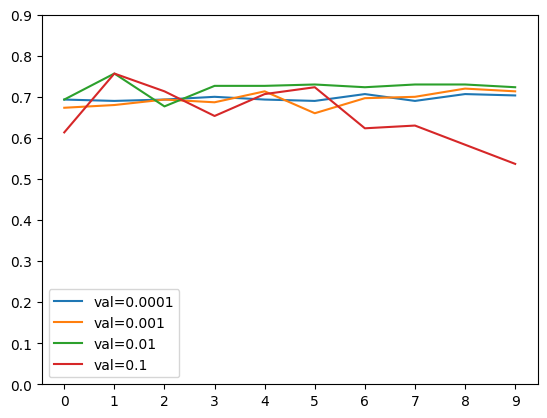

In [ ]:
for size, hist in scores.items():
    plt.plot(hist['val_accuracy'], label=('val=%s' % size))

plt.xticks(np.arange(10))
plt.yticks(np.arange(0, 1, step=0.1))
plt.legend()

In [ ]:
learning_rate = 0.01

#### does performance of lr 0.01 change if i rebuild model using a function?

answer: Yes. lr 0.001 drops to 3rd if building from scratch vs. compiling

In [ ]:
def build_model(learning_rate=0.001):
  # base
  base_model = Xception(
      weights='imagenet',
      include_top=False,
      input_shape=(150,150,3)
  )

  base_model.trainable = False

  inputs = keras.Input(shape=(150,150,3))

  base = base_model(inputs, training=False)

  vectors = keras.layers.GlobalAveragePooling2D()(base)

  outputs = keras.layers.Dense(3)(vectors)

  model = keras.Model(inputs, outputs)

  # loss
  loss = keras.losses.CategoricalCrossentropy(from_logits=True)

  # optimizer
  optimizer = keras.optimizers.Adam(learning_rate=learning_rate)

  # compile
  model.compile(
      optimizer=optimizer,
      loss=loss,
      metrics=['accuracy']
  )

  return model

In [ ]:
scores = {}

for lr in [0.0001, 0.001, 0.01, 0.1]:
  model = build_model(lr)
  history = model.fit(train_dataset, epochs=10, validation_data=val_dataset)
  scores[lr] = history.history

  print()
  print()

Epoch 1/10
57/57 [==============================] - 19s 291ms/step - loss: 0.8746 - accuracy: 0.6439 - val_loss: 0.9885 - val_accuracy: 0.4867
Epoch 2/10
57/57 [==============================] - 16s 286ms/step - loss: 0.6140 - accuracy: 0.8289 - val_loss: 0.8901 - val_accuracy: 0.5567
Epoch 3/10
57/57 [==============================] - 15s 265ms/step - loss: 0.4817 - accuracy: 0.8661 - val_loss: 0.8225 - val_accuracy: 0.6000
Epoch 4/10
57/57 [==============================] - 15s 262ms/step - loss: 0.4009 - accuracy: 0.8956 - val_loss: 0.7838 - val_accuracy: 0.5933
Epoch 5/10
57/57 [==============================] - 15s 263ms/step - loss: 0.3446 - accuracy: 0.9144 - val_loss: 0.7249 - val_accuracy: 0.6400
Epoch 6/10
57/57 [==============================] - 15s 255ms/step - loss: 0.3021 - accuracy: 0.9306 - val_loss: 0.7076 - val_accuracy: 0.6367
Epoch 7/10
57/57 [==============================] - 15s 269ms/step - loss: 0.2700 - accuracy: 0.9383 - val_loss: 0.6731 - val_accuracy: 0.6700

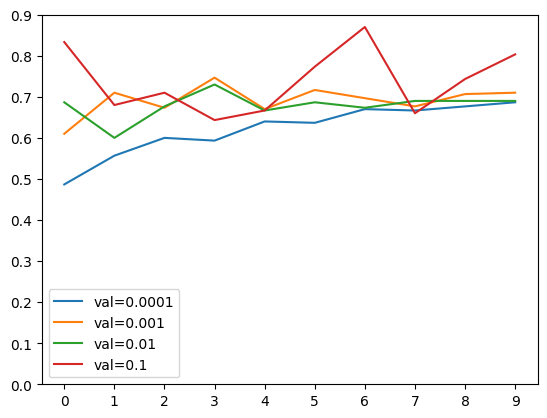

In [ ]:
for size, hist in scores.items():
    plt.plot(hist['val_accuracy'], label=('val=%s' % size))

plt.xticks(np.arange(10))
plt.yticks(np.arange(0, 1, step=0.1))
plt.legend()

### size of extra layer

In [ ]:
def build_model(learning_rate=0.001, size=100):
  # base
  base_model = Xception(
      weights='imagenet',
      include_top=False,
      input_shape=(150,150,3)
  )

  base_model.trainable = False

  inputs = keras.Input(shape=(150,150,3))

  base = base_model(inputs, training=False)

  vectors = keras.layers.GlobalAveragePooling2D()(base)

  # add an additional inner layer
  inner = keras.layers.Dense(units=size, activation='relu')(vectors)

  outputs = keras.layers.Dense(3)(inner)

  model = keras.Model(inputs, outputs)

  # loss
  loss = keras.losses.CategoricalCrossentropy(from_logits=True)

  # optimizer
  optimizer = keras.optimizers.Adam(learning_rate=learning_rate)

  # compile
  model.compile(
      optimizer=optimizer,
      loss=loss,
      metrics=['accuracy']
  )

  return model

In [ ]:
learning_rate = 0.001

scores = {}

for size in [10, 100, 1000]:
  model = build_model(learning_rate, size)
  history = model.fit(train_dataset, epochs=10, validation_data=val_dataset)
  scores[size] = history.history

  print()
  print()

Epoch 1/10
57/57 [==============================] - 23s 350ms/step - loss: 0.4240 - accuracy: 0.8422 - val_loss: 0.6933 - val_accuracy: 0.6400
Epoch 2/10
57/57 [==============================] - 22s 393ms/step - loss: 0.0968 - accuracy: 0.9767 - val_loss: 0.8329 - val_accuracy: 0.6167
Epoch 3/10
57/57 [==============================] - 17s 306ms/step - loss: 0.0513 - accuracy: 0.9900 - val_loss: 0.5267 - val_accuracy: 0.7633
Epoch 4/10
57/57 [==============================] - 16s 272ms/step - loss: 0.0297 - accuracy: 0.9961 - val_loss: 0.6226 - val_accuracy: 0.7300
Epoch 5/10
57/57 [==============================] - 18s 323ms/step - loss: 0.0202 - accuracy: 0.9989 - val_loss: 0.7106 - val_accuracy: 0.6933
Epoch 6/10
57/57 [==============================] - 18s 322ms/step - loss: 0.0152 - accuracy: 0.9989 - val_loss: 0.8303 - val_accuracy: 0.6800
Epoch 7/10
57/57 [==============================] - 16s 289ms/step - loss: 0.0120 - accuracy: 0.9994 - val_loss: 0.8263 - val_accuracy: 0.6733

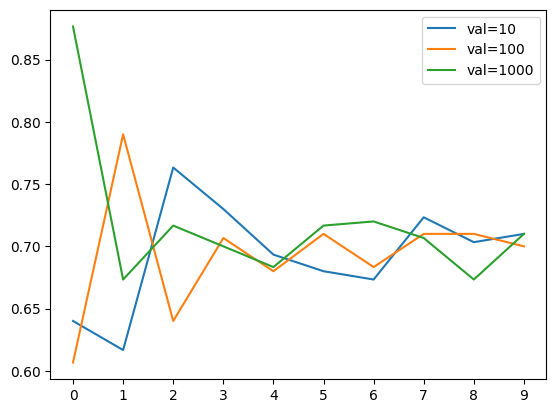

In [ ]:
for size, hist in scores.items():
  plt.plot(hist['val_accuracy'], label=('val=%s' % size))

plt.xticks(np.arange(10))
#plt.yticks([0.78, 0.80, 0.82, 0.825, 0.83])
#plt.yticks(np.arange(0, 1, step=0.1))
plt.legend()

### regularization and dropout

In [50]:
def build_model(learning_rate=0.001, size=10, droprate=0.5):
  # base
  base_model = Xception(
      weights='imagenet',
      include_top=False,
      input_shape=(150,150,3)
  )

  base_model.trainable = False

  inputs = keras.Input(shape=(150,150,3))

  base = base_model(inputs, training=False)

  vectors = keras.layers.GlobalAveragePooling2D()(base)

  # add an additional inner layer
  inner = keras.layers.Dense(units=size, activation='relu')(vectors)

  # add dropout
  drop = keras.layers.Dropout(rate=droprate)(inner)

  outputs = keras.layers.Dense(3)(drop)

  model = keras.Model(inputs, outputs)

  # loss
  loss = keras.losses.CategoricalCrossentropy(from_logits=True)

  # optimizer
  optimizer = keras.optimizers.Adam(learning_rate=learning_rate)

  # compile
  model.compile(
      optimizer=optimizer,

      loss=loss,
      metrics=['accuracy']
  )

  return model

In [54]:
learning_rate = 0.001
size = 100

scores = {}

for droprate in [0.0, .2, .5, .8]:
  model = build_model(learning_rate, size, droprate)
  history = model.fit(train_dataset, epochs=10, validation_data=val_dataset)
  scores[droprate] = history.history

  print()
  print()

Epoch 1/10
57/57 [==============================] - 19s 280ms/step - loss: 0.2302 - accuracy: 0.9111 - val_loss: 0.5700 - val_accuracy: 0.7633
Epoch 2/10
57/57 [==============================] - 15s 269ms/step - loss: 0.0464 - accuracy: 0.9861 - val_loss: 0.6275 - val_accuracy: 0.7200
Epoch 3/10
57/57 [==============================] - 15s 259ms/step - loss: 0.0130 - accuracy: 0.9994 - val_loss: 0.7095 - val_accuracy: 0.7033
Epoch 4/10
57/57 [==============================] - 15s 268ms/step - loss: 0.0078 - accuracy: 1.0000 - val_loss: 0.7367 - val_accuracy: 0.7000
Epoch 5/10
57/57 [==============================] - 15s 264ms/step - loss: 0.0053 - accuracy: 1.0000 - val_loss: 0.8070 - val_accuracy: 0.7000
Epoch 6/10
57/57 [==============================] - 15s 257ms/step - loss: 0.0039 - accuracy: 1.0000 - val_loss: 1.0154 - val_accuracy: 0.6467
Epoch 7/10
57/57 [==============================] - 15s 259ms/step - loss: 0.0032 - accuracy: 1.0000 - val_loss: 0.9170 - val_accuracy: 0.6767

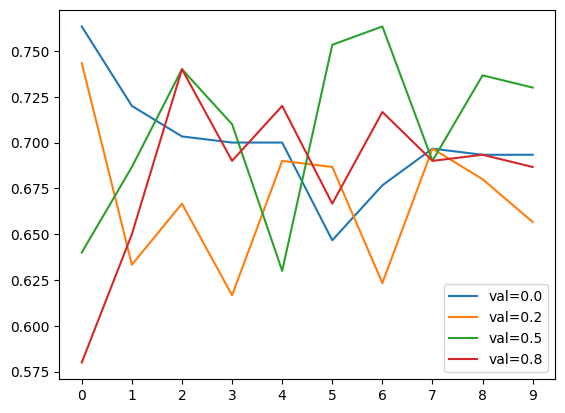

In [55]:
for droprate, hist in scores.items():
  plt.plot(hist['val_accuracy'], label=('val=%s' % droprate))

plt.xticks(np.arange(10))
plt.legend()

### data augmentation

In [58]:
train_generator = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    vertical_flip=True,
    rotation_range=50,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
    )

train_dataset = train_generator.flow_from_directory(
    './where-am-i/Data/train',
    target_size=(150, 150),
    batch_size=32,
    shuffle=True
)

Found 1800 images belonging to 3 classes.


In [59]:
learning_rate = 0.001
size = 100
droprate = 0.5

model = build_model(learning_rate, size, droprate)
history = model.fit(train_dataset, epochs=10, validation_data=val_dataset)

Epoch 1/10
57/57 [==============================] - 28s 427ms/step - loss: 0.4167 - accuracy: 0.8378 - val_loss: 0.8106 - val_accuracy: 0.6233
Epoch 2/10
57/57 [==============================] - 26s 463ms/step - loss: 0.1974 - accuracy: 0.9328 - val_loss: 0.8248 - val_accuracy: 0.6300
Epoch 3/10
57/57 [==============================] - 24s 423ms/step - loss: 0.1458 - accuracy: 0.9511 - val_loss: 0.8500 - val_accuracy: 0.6600
Epoch 4/10
57/57 [==============================] - 24s 425ms/step - loss: 0.1469 - accuracy: 0.9494 - val_loss: 0.9184 - val_accuracy: 0.6367
Epoch 5/10
57/57 [==============================] - 23s 400ms/step - loss: 0.1125 - accuracy: 0.9639 - val_loss: 1.1935 - val_accuracy: 0.6100
Epoch 6/10
57/57 [==============================] - 24s 427ms/step - loss: 0.1062 - accuracy: 0.9639 - val_loss: 1.0277 - val_accuracy: 0.6400
Epoch 7/10
57/57 [==============================] - 24s 427ms/step - loss: 0.0985 - accuracy: 0.9650 - val_loss: 1.0963 - val_accuracy: 0.6467

In [61]:
history

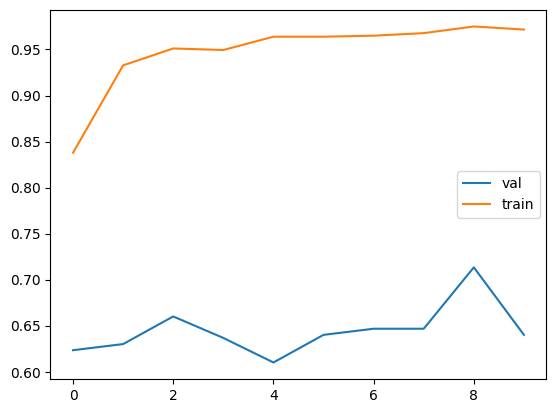

In [63]:
hist = history.history
plt.plot(hist['val_accuracy'], label='val')
plt.plot(hist['accuracy'], label='train')

plt.legend()

### larger model (increase input size)

In [64]:
def build_model(learning_rate=0.001, size=10, droprate=0.5, input_size=150):
  # base
  base_model = Xception(
      weights='imagenet',
      include_top=False,
      input_shape=(input_size,input_size,3)
  )

  base_model.trainable = False

  inputs = keras.Input(shape=(150,150,3))

  base = base_model(inputs, training=False)

  vectors = keras.layers.GlobalAveragePooling2D()(base)

  # add an additional inner layer
  inner = keras.layers.Dense(units=size, activation='relu')(vectors)

  # add dropout
  drop = keras.layers.Dropout(rate=droprate)(inner)

  outputs = keras.layers.Dense(3)(drop)

  model = keras.Model(inputs, outputs)

  # loss
  loss = keras.losses.CategoricalCrossentropy(from_logits=True)

  # optimizer
  optimizer = keras.optimizers.Adam(learning_rate=learning_rate)

  # compile
  model.compile(
      optimizer=optimizer,

      loss=loss,
      metrics=['accuracy']
  )

  return model

In [68]:
input_size = 299
learning_rate = 0.0001
size = 100
droprate = 0.5

model = build_model(learning_rate, size, droprate, input_size)
history = model.fit(train_dataset, epochs=50, validation_data=val_dataset)

Epoch 1/50
57/57 [==============================] - 29s 451ms/step - loss: 0.8368 - accuracy: 0.6178 - val_loss: 0.8584 - val_accuracy: 0.5700
Epoch 2/50
57/57 [==============================] - 27s 467ms/step - loss: 0.4874 - accuracy: 0.8261 - val_loss: 0.8503 - val_accuracy: 0.5567
Epoch 3/50
57/57 [==============================] - 23s 412ms/step - loss: 0.3699 - accuracy: 0.8706 - val_loss: 0.8040 - val_accuracy: 0.6200
Epoch 4/50
57/57 [==============================] - 25s 431ms/step - loss: 0.3055 - accuracy: 0.9094 - val_loss: 0.8553 - val_accuracy: 0.5933
Epoch 5/50
57/57 [==============================] - 24s 418ms/step - loss: 0.2500 - accuracy: 0.9183 - val_loss: 0.8704 - val_accuracy: 0.6000
Epoch 6/50
57/57 [==============================] - 24s 420ms/step - loss: 0.2242 - accuracy: 0.9256 - val_loss: 0.8934 - val_accuracy: 0.6100
Epoch 7/50
57/57 [==============================] - 24s 427ms/step - loss: 0.2174 - accuracy: 0.9322 - val_loss: 0.8332 - val_accuracy: 0.6233

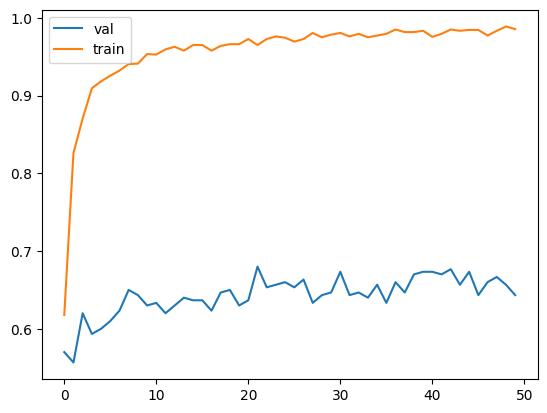

In [69]:
hist = history.history
plt.plot(hist['val_accuracy'], label='val')
plt.plot(hist['accuracy'], label='train')

plt.legend()

# InceptionV3 model

## create dataset

In [ ]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_generator = ImageDataGenerator(preprocessing_function=preprocess_input)

train_dataset = train_generator.flow_from_directory(
    './where-am-i/Data/train',
    target_size=(150,150),
    batch_size=32
)

Found 1800 images belonging to 3 classes.


In [ ]:
# train_dataset.class_indices

In [ ]:
val_generator = ImageDataGenerator(preprocessing_function=preprocess_input)

val_dataset = val_generator.flow_from_directory(
    './where-am-i/Data/Val',
    target_size=(150,150),
    batch_size=32,
    shuffle=False
)

Found 300 images belonging to 3 classes.


## inceptionv3 vanilla

In [ ]:
base_model = InceptionV3(
    include_top=False,
    weights='imagenet',
    input_shape=(150,150,3)
)

base_model.trainable = False

inputs = keras.Input(shape=(150,150,3))

base = base_model(inputs, training=False)

vectors = keras.layers.GlobalAveragePooling2D()(base)

outputs = keras.layers.Dense(3)(vectors)

model = keras.Model(inputs, outputs)

87910968/87910968 [==============================] - 0s 0us/step


In [ ]:
learning_rate = 0.01
optimizer = keras.optimizers.Adam(learning_rate=learning_rate)

loss = keras.losses.CategoricalCrossentropy(from_logits=True)

model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

In [ ]:
history = model.fit(train_dataset, epochs=10, validation_data=val_dataset)

Epoch 1/10
57/57 [==============================] - 25s 345ms/step - loss: 0.2766 - accuracy: 0.9356 - val_loss: 0.7442 - val_accuracy: 0.8400
Epoch 2/10
57/57 [==============================] - 15s 256ms/step - loss: 0.0459 - accuracy: 0.9889 - val_loss: 0.7919 - val_accuracy: 0.8500
Epoch 3/10
57/57 [==============================] - 15s 261ms/step - loss: 0.0212 - accuracy: 0.9944 - val_loss: 0.5154 - val_accuracy: 0.9133
Epoch 4/10
57/57 [==============================] - 15s 266ms/step - loss: 0.0061 - accuracy: 0.9967 - val_loss: 0.7566 - val_accuracy: 0.8600
Epoch 5/10
57/57 [==============================] - 15s 259ms/step - loss: 0.0111 - accuracy: 0.9961 - val_loss: 1.5269 - val_accuracy: 0.7767
Epoch 6/10
57/57 [==============================] - 15s 258ms/step - loss: 0.0834 - accuracy: 0.9856 - val_loss: 1.2483 - val_accuracy: 0.8400
Epoch 7/10
57/57 [==============================] - 15s 261ms/step - loss: 0.0414 - accuracy: 0.9889 - val_loss: 1.6121 - val_accuracy: 0.8467

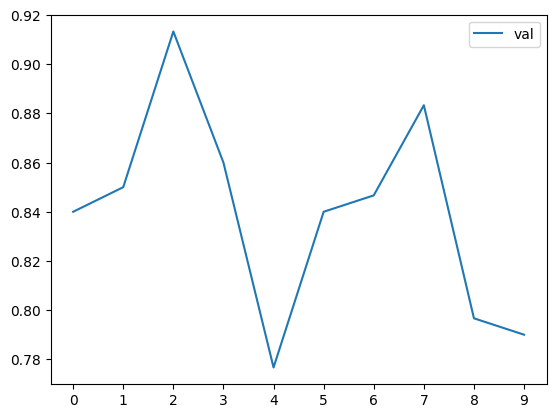

In [ ]:
plt.plot(history.history['val_accuracy'], label='val')
plt.xticks(np.arange(10))
plt.legend()

## hyperparameter tuning

### learning rate

### size of extra layer

### regularization and dropout

### data augmentation

### larger model (increase input size)

# EfficientNetV2L model

## create dataset

## EfficientNetV2L vanilla

## hyperparameter tuning

### learning rate

### size of extra layer

### regularization and dropout

### data augmentation

### larger model (increase input size)

# ResNet152V2 model

## create dataset

## EfficientNetV2L vanilla

## hyperparameter tuning

### learning rate

### size of extra layer

### regularization and dropout

### data augmentation

### larger model (increase input size)